# Balduzzi, et al (1996) Model:
Balduzzi et al (1996) propose a three-factor model of the term structure. These factors are the short rate, the mean of the short rate, and the volatility of the short rate. 

We can express such a set of models as follows:
\begin{equation}
dr=\mu_r(r,\theta,t)dt+\sigma_r(r,V,t)dz
\end{equation}

\begin{equation}
d\theta=\mu_\theta(\theta,t)dt+\sigma_\theta(\theta,t)dw
\end{equation}

\begin{equation}
dV=\mu_V(V,t)dt+\sigma_V(V,t)dy,
\end{equation}
where $\mu$ is the drift term and $\sigma$ is the diffusion term. $r$ is the short-term interest rate, $\theta$ is the mean rate, and $V$ is the volatility of the short rate. $dz$, $dw$, and $dy$ are three Winer processes that may be correlated.



# A Specific Example:
We specify equations for the three factors as follows:
\begin{equation}
dr=\kappa(\theta-r)dt+\sqrt{V}dz,
\end{equation}

\begin{equation}
d\theta=\alpha(\beta-\theta)dt+\eta dw,
\end{equation}

\begin{equation}
dV=a(b-V)dt+\phi\sqrt{V} dy,
\end{equation}

where $\kappa$, $\alpha$, and $a$ are the mean-reversion coefficients, and $\beta$ and $b$ are the mean levels of $\theta$ and $V$. The volatility coefficients for the mean rate and volatility are $\eta$ and $\phi$. $dr$, $d\theta$ and $dV$ are the changes in the short rate, mean rate and volatility.

The first and third equation are identical to those  of the Fong, Vasicek, and Yoo (1992) model. The model is extended to include a time-varying central tendency process $\theta$. A strong case is made for the inclusion of this factor in Balduzzi 1996 (THE CENTRAL TENDENCY).

As before, $dz$, $dw$, and $dy$ are Wiener process increments which are related as follows:
\begin{equation}
dz\ dy=\rho dt
\end{equation}
\begin{equation}
dz\ dw=0
\end{equation}
\begin{equation}
dw\ dy=0
\end{equation}

Hence, changes in the interest rate and volatility are correlated. The mean rate is driven by independent innovations.

After specifying the stochastic processes that explain the movement of interest rates, the next step is to derive an equilibrium condition that precludes riskless arbitrage, and to define the risk premia associated with the factors. The prices of risk are denoted as $\lambda_r$, $\lambda_\theta$, and  $\lambda_V$.

Define the bond price $P(r,\theta,V,t)$ as a function of the three factors and time to maturity $t$. Denoting the subscripts as derivatives, we can write the partial differential equation for the bond price as:
\begin{equation}
\begin{split}
0 & =\left(\kappa(\theta-r)-\lambda_r V\right)P_t +\frac{1}{2}V P_{tt} \\
  & + \left(\alpha(\beta-\theta)+\lambda_\theta\eta \right)P_\theta +\frac{1}{2}\eta^2P_{\theta\theta} \\ &+ \left(a(b-V)-\lambda_V V\right)P_V +\frac{1}{2}\phi^2 V P_{V V} \\
  & + \rho\phi V P_{r V}-P_t-r P
\end{split}
\end{equation}

Such PDEs do not admit simple analytics solutions. Hence, we reduce the solution of the PDE to the solutions of a system of four ODEs.

To do this, we assume the solution of the bond price is given by:
\begin{equation}
P(r,\theta,V,t)=A(t)exp\left(-r B(t)- \theta C(t)-V D(t)\right).
\end{equation}

Taking the appropriate derivatives and substituting into the PDE, we have:
\begin{equation}
\begin{split}
0 & =r\left(\kappa A(t) B(t)+A(t) B'(t)-A(t)\right) \\
  & + \theta\left(-\kappa A(t) B(t) +\alpha A(t) C(t)+A(t) C'(t) \right) \\
  &+ V\left(\lambda_r A(t) B(t) +\frac{1}{2}A(t) B(t)^2+a A(t) D(t) +\frac{1}{2}\phi^2 A(t) D(t)^2 +\rho\phi A(t) B(t) +A(t) D'(t) +\lambda_V A(t) D(t) \right) \\
  & +\left(-\alpha\beta A(t) C(t) +\frac{1}{2}\eta^2A(t) C(t)^2 -a b A(t) D(t) -A'(t)+\lambda_\theta A(t) C(t) \right)
\end{split}\end{equation}

For (ref. the above) to be uniformly satisfied over the support of $r$, $\theta$ and $V$, all four of the terms in brackets must be equal to zero. Hence we arrive at the system of ODEs.

# System of ODEs:
The solutions of $A(t)$, $B(t)$, $C(t)$ and $D(t)$ are found by integrating the following system of ODEs:
\begin{equation}
A'(t)=A(t)\left(-\alpha\beta C(t)+\frac{1}{2} \eta^2 C(t)^2-a b D(t)+\lambda_\theta C(t)\right), \qquad A(0)=0
\end{equation}

\begin{equation}
B'(t)=1-\kappa B(t),\qquad B(0)=0 
\end{equation}

\begin{equation}
C'(t)=\kappa B(t)-\alpha C(t), \qquad C(0)=0 
\end{equation}

\begin{equation}
D'(t)=-\lambda_r B(t)-\frac{1}{2}B(t)^2-a D(t)-\frac{1}{2}\phi^2D(t)^2-\rho\phi B(t) D(t)-\lambda_V D(t), \qquad D(0)=0
\end{equation}

We will detail our approach to solving this system of ODEs in the following sections.

# Libraries and Set_Size Function:
Importing libraries and defining the set_size function.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib
import warnings
warnings.filterwarnings('ignore') #ignoring undefined 0/0 division for first value of 'ytm'
#Function to Set Size of Plot Axes
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Setting the Integrating Method and Global Variables:
We use the Runge-Kutta method to integrate the ODEs which do not admit analytical, closed-form solutions.

Our fixed parameters are from Balduzzi et al 1996.

In [3]:
method='RK45' #solve_ivp will use Runge-Kutta method
###############################################################################
""""All values here are from 'Exhibit 1' in Balduzzi."""
###############################################################################
#Fixed Parameters
kappa=0.25
alpha=0.76
beta=0.12
eta=0.02
a=0.29
b=0.0007
phi=0.003
rho=-0.12
#Market Price of Risk
lambda_r=-0.1
lambda_theta=0.
lambda_V=0.

#Time to Maturity
T=30.0

#State Vars
r=0.1 
theta=0.08
V=0.0008

# Closed Form Analytical Solutions:
Using the method of separation of variables, we obtain the analytical solution to $B'(t)$:
\begin{equation}
B'(t)=1-\kappa B(t),\qquad B(0)=0 
\end{equation}

\begin{equation}
B(t)=\frac{1-e^{-\kappa t}}{\kappa}.
\end{equation}
Using this solution, we can now obtain the analytical solution to $C'(t)$:
\begin{equation}
C'(t)=\kappa B(t)-\alpha C(t), \qquad C(0)=0 
\end{equation}

\begin{equation}
C(t)=\frac{(1-e^{-\kappa t})+\frac{\kappa}{\alpha}e^{-\alpha t}(1-e^{\alpha t})}{\alpha-\kappa}.
\end{equation}

In [4]:
def B(t):
    return (1-np.exp(-kappa*t))/kappa

def C(t):
    return ((alpha-kappa+alpha*(-np.exp(-kappa*t))+kappa*np.exp(-alpha*t)))/(alpha**2-alpha*kappa)

# Functions to be Integrated Numerically:
Now that we have $B(t)$ and $C(t)$, we can apply numerical methods to obtain the solutions to the first-order, non-linear ODE $D'(t)$  (also known as a Ricatti equation) and the first-order, linear ODE $A'(t)$ .
The two equations are:
\begin{equation}
D'(t)=-\lambda_r B(t)-\frac{1}{2}B(t)^2-a D(t)-\frac{1}{2}\phi^2D(t)^2-\rho\phi B(t) D(t)-\lambda_V D(t)
\end{equation}
and,

\begin{equation}
A'(t)=A(t)\left(-\alpha\beta C(t)+\frac{1}{2} \eta^2 C(t)^2-a b D(t)+\lambda_\theta C(t)\right)
\end{equation}

In [5]:
def f(t,z): 
    D=z[0] #D(0)=0
    A=z[1] #A(0)=1
    Ddash_tau=-((lambda_r*(B(t)))+(1/2)*((B(t))**2)+a*D+(1/2)*(phi**2)*((D)**2)+
              rho*phi*(B(t))*D + lambda_V*D) 
    #first-order non-linear ODE. (Ricatti Equation)
    #D is D(t)
    Adash_tau=A*(-alpha*beta*C(t)+(1/2)*(eta**2)*(C(t)**2)-a*b*D+lambda_theta*C(t))
    #first-order linear ODE
    #A is A(t)
    D_A = [Ddash_tau,Adash_tau] 
    return D_A

zinit = [0.,1.] #initial condition for D(t) and A(t)


# Integrating ODEs:
We apply numerical methods to integrate $D'(t)$ and $A'(t)$.

In [6]:
ntol=30
tolmax=1e-3
tolmin=1e-12
ltolmax=np.log10(tolmax)
ltolmin=np.log10(tolmin)
dltol=(ltolmax-ltolmin)/ntol
#errs=np.zeros([ntol+1,3])
for counter in range(-1,ntol+1):
    if counter==-1: # reference solution (set up later)
        ltol=ltolmin-1
    else:
        itol=ntol-counter
        ltol=ltolmin+itol*dltol
    tol=10**ltol

    rtol=tol
    atol=tol

    t=0.0
    ti=T
    #Integrating IVPs
    sol=solve_ivp(fun=f, t_span=(t,ti), rtol=rtol, atol=atol,y0=zinit, method=method)

# Plotting the Factors:

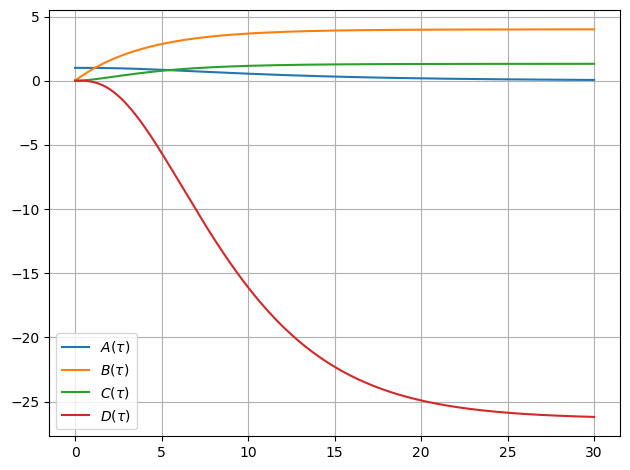

In [7]:
#Plot of Factors
plt.grid()
plt.plot(sol.t, sol.y[1], label='$A(\\tau)$')
plt.plot(sol.t,B(sol.t),label='$B(\\tau)$')
plt.plot(sol.t,C(sol.t),label='$C(\\tau)$')
plt.plot(sol.t, sol.y[0], label='$D(\\tau)$')
plt.legend(loc="lower left")
plt.show()

# Finding Bond Prices and Yields-to-Maturity:
Our conjectured solution to the bond price is:
\begin{equation}
P(r,\theta,V,t)=A(t) exp\left(-r B(t) -\theta C(t)-V D(t)\right).
\end{equation}
Hence, our yield-to-maturity is given by the standard term structure expression:
\begin{equation}
Y(r, \theta, V, t)=-\frac{log P(r, \theta, V, t)}{t}.
\end{equation}

In [8]:
B1=np.zeros([len(sol.t)])
C1=np.zeros([len(sol.t)])
P=np.zeros([len(sol.t)])
ytm=np.zeros([len(sol.t)])
ytm1=np.zeros([len(sol.t)])
ytm2=np.zeros([len(sol.t)])
ytm3=np.zeros([len(sol.t)])
ytm4=np.zeros([len(sol.t)])

for i in range(len(sol.t)): #turning function into array
    C1[i]=C(sol.t[i])
    B1[i]=B(sol.t[i])
A1=sol.y[1]
D1=sol.y[0]

# Characterising the Term Structure of Interest Rates:
A popular way to characterise the term structure shape has been in terms of three components: level, curvature, and steepness. In a very influential paper, Litterman and Sheinkamn (1991) have shown that these three factors capture about 96% of changes in the values of bonds.

# Yield Curves for Decreasing $r$:
The figure below demonstrates the effect of the short-term interest rate on the yield curve. We can observe that the short rate provides the level of the curve.  

In [9]:
###############################################################################  
###Finding Bond Prices and Yield-To-Maturity:###
###Exhibit 1:####
###############################################################################  
#theta=0
r=0.1
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
r=0.08
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm1[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
r=0.06
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm2[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
r=0.04
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm3[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
r=0.02
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm4[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.

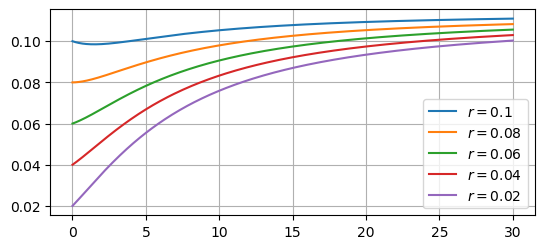

In [10]:
plt.grid()
plt.plot(sol.t,ytm, label='$r=0.1$') #Plot of YTMs
plt.plot(sol.t,ytm1,label='$r=0.08$') #Plot of YTMs
plt.plot(sol.t,ytm2, label='$r=0.06$') #Plot of YTMs
plt.plot(sol.t,ytm3,label='$r=0.04$') #Plot of YTMs
plt.plot(sol.t,ytm4,label='$r=0.02$') #Plot of YTMs
plt.legend(loc='lower right')
set_size(4.3,2) 
plt.show()

# Yield Curves for Decreasing $\theta$:
The figure below demonstrates the effect of the mean rate on the yield curve. We can observe that the mean level of the mean rate dictates the steepness of the term structure.

In [11]:
############################################################################### 
###Exhibit 2:####
############################################################################### 
r=0.06
theta=0.1
for i in range(len(sol.t)):
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
theta=0.08
for i in range(len(sol.t)):
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm1[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
theta=0.06
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm2[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
theta=0.04
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm3[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
theta=0.02
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm4[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.

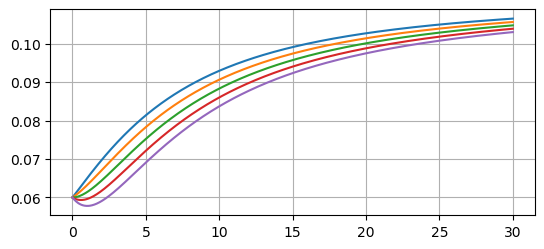

In [12]:
plt.grid()
plt.plot(sol.t,ytm) #Plot of YTMs
plt.plot(sol.t,ytm1) #Plot of YTMs
plt.plot(sol.t,ytm2) #Plot of YTMs
plt.plot(sol.t,ytm3) #Plot of YTMs
plt.plot(sol.t,ytm4) #Plot of YTMs
set_size(4.3,2) 
plt.show()

# Yield Curves for Increasing $V$:
The figure below demonstrates the effect of volatility on the yield curve. We can observe that the volatility has a strong influence on the medium-term maturities of the term structure, and is responsible for the hump or curvature experienced.

In [13]:
############################################################################### 
###Exhibit 3:####
############################################################################### 
#%%capture
r=0.06
theta=0.08
V=0.0042
for i in range(len(sol.t)):
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
V=0.0084
for i in range(len(sol.t)):
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm1[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
V=0.0126
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm2[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
V=0.0168
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm3[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
V=0.0252
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm4[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.

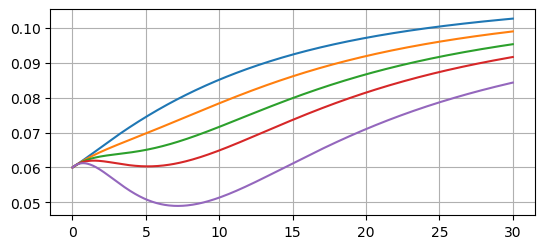

In [14]:
plt.grid()
plt.plot(sol.t,ytm) #Plot of YTMs
plt.plot(sol.t,ytm1) #Plot of YTMs
plt.plot(sol.t,ytm2) #Plot of YTMs
plt.plot(sol.t,ytm3) #Plot of YTMs
plt.plot(sol.t,ytm4) #Plot of YTMs
set_size(4.3,2) 
plt.show()

# Conclusions:
We have noted that the three factors above contribute to the three components of the term structure which account for 96% of changes in the values of bonds (Litterman and Scheinkman (1991)).

This analysis then permits an economic interpretation of the factors and allows for the model to be implemented in realistic settings. This is in contrast to the two-factor and three-factor Cox-Ingersoll-Ross models which we have considered in the preceding chapters (Dai and Singleton (2000)).

For example, the short rate of interest (the one-month Treasury-bill rate) is a good proxy for the first factor $r$, but the other two factors $\theta$ and $V$ are unobservable. These two factors can be recovered however, and this process is detailed in Balduzzi et al. (1996).

Without following this process, we can select values in order to build a 'narrative' and hence simulate the term structure in different economic conditions.

We can create such a narrative as follows. Let's say $r=0.15$, which is a high short rate  we would only expect to see in adverse economic conditions when a government is encourage investors to take on short-term bonds. We choose the mean rate $\theta=0.05$ and select a high volatility of $V=0.025$. 

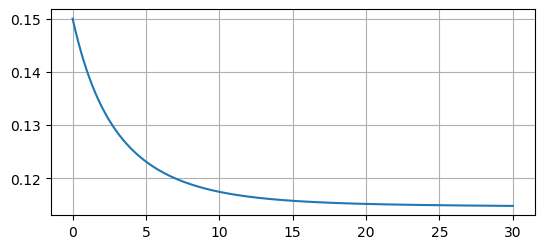

In [15]:
T=30
r=0.15
theta=0.05
V=0.0025
##############################################################################################
ti=T
sol=solve_ivp(fun=f, t_span=(t,ti), rtol=rtol, atol=atol,y0=zinit, method=method)
##############################################################################################
B1=np.zeros([len(sol.t)])
C1=np.zeros([len(sol.t)])
P=np.zeros([len(sol.t)])
ytm=np.zeros([len(sol.t)])
ytm1=np.zeros([len(sol.t)])
ytm2=np.zeros([len(sol.t)])
ytm3=np.zeros([len(sol.t)])
ytm4=np.zeros([len(sol.t)])
##############################################################################################
for i in range(len(sol.t)): #turning function into array
    C1[i]=C(sol.t[i])
    B1[i]=B(sol.t[i])
A1=sol.y[1]
D1=sol.y[0]
##############################################################################################
for i in range(len(sol.t)): 
    P[i]=A1[i]*np.exp(-r*B1[i]-theta*C1[i]-V*D1[i]) #Find Bond Price Using '6'
    ytm[i]=-(np.log(P[i]))/sol.t[i] #Find YTM using EQ at bottom of pg46.
##############################################################################################
plt.grid()
plt.plot(sol.t,ytm)
set_size(4.3,2) 
plt.show()

As might have been expected, this results in an inverted yield curve which typically signals recession (Harvey (....)).